In [2]:
import pandas as pd
import nx2pd as nx 
from matplotlib import pyplot as plt
import matplotlib.dates as md
from dask import dataframe as dd
import glob


>>> Loading nx2pd.py version of 24.10.2022 @ 03:17PM



In [3]:
my_files = glob.glob('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2022_dev/rawdata/'
     'HX:FILLN=*/HX:BMODE=ADJUST/*.parquet')

In [4]:
my_df = dd.read_parquet(my_files,
columns=['RPMBD.RR17.ROF.A12B1:I_MEAS', 'RPMBD.RR17.ROD.A12B1:I_MEAS']).dropna().compute()
nx.pandas_index_localize(my_df)

RPMBD.RR17.ROF.A12B1:I_MEAS  \
2022-07-01 01:07:38.580000+00:00                   236.420761   
2022-07-01 01:07:41.080000+00:00                   236.421982   
2022-07-01 01:07:43.580000+00:00                   236.422791   
2022-07-01 01:07:46.080000+00:00                   236.419281   
2022-07-01 03:44:27.580000+00:00                   236.421951   
...                                                       ...   
2022-11-27 22:13:57.620000+00:00                   433.438660   
2022-11-27 22:13:58.620000+00:00                   433.440796   
2022-11-27 22:14:00.120000+00:00                   433.440155   
2022-11-27 22:14:01.620000+00:00                   433.440002   
2022-11-27 22:14:02.620000+00:00                   433.440704   

                                  RPMBD.RR17.ROD.A12B1:I_MEAS  
2022-07-01 01:07:38.580000+00:00                  -236.422012  
2022-07-01 01:07:41.080000+00:00                  -236.421524  
2022-07-01 01:07:43.580000+00:00                  -236.422958  
2022-07-01 01:07:46.080000+00:00                  -236.422256  
2022-07-01 03:44:27.580000+00:00                  -236.421799  
...                                                       ...  
2022-11-27 22:13:57.620000+00:00                  -433.440002  
2022-11-27 22:13:58.620000+00:00                  -433.439606  
2022-11-27 22:14:00.120000+00:00                  -433.441193  
2022-11-27 22:14:01.620000+00:00                  -433.441254  
2022-11-27 22:14:02.620000+00:00                  -433.439758  

[248959 rows x 2 columns]

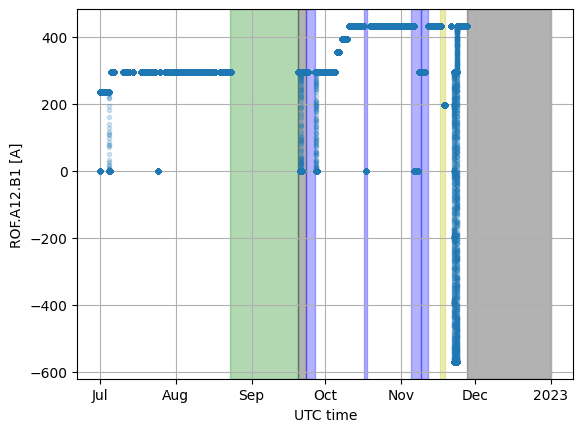

In [5]:
plt.plot(my_df['RPMBD.RR17.ROF.A12B1:I_MEAS'],'.', alpha = .2)
plt.grid(True)
plt.ylabel('ROF.A12.B1 [A]')
plt.xlabel('UTC time')
locator = md.AutoDateLocator()
xfmt = md.ConciseDateFormatter(locator)
ax = plt.gca()
ax.xaxis.set_major_formatter(xfmt)

def plot_schedule(ax):
    # https://indico.cern.ch/event/1194548/contributions/5093907/attachments/2560485/4413186/LHCFeedback.pdf
    
    #ax.axvspan(pd.Timestamp('2022-08-04'),pd.Timestamp('2022-08-23'), color= 'r', alpha=.3) # Collision >1200b
    ax.axvspan(pd.Timestamp('2022-08-23'),pd.Timestamp('2022-09-20'), color= 'g', alpha=.3) # RF problem
    ax.axvspan(pd.Timestamp('2022-09-20'),pd.Timestamp('2022-09-23'), color= 'k', alpha=.3) # RF problem
    ax.axvspan(pd.Timestamp('2022-11-28'),pd.Timestamp('2023-01'), color= 'k', alpha=.3) #YETS

    #MD and special
    ax.axvspan(pd.Timestamp('2022-10-17'),pd.Timestamp('2022-10-18'), color= 'b', alpha=.3)
    ax.axvspan(pd.Timestamp('2022-11-5'),pd.Timestamp('2022-11-9'), color= 'b', alpha=.3) 
    ax.axvspan(pd.Timestamp('2022-09-23'),pd.Timestamp('2022-09-27'), color= 'b', alpha=.3) # Special run LHCf
    ax.axvspan(pd.Timestamp('2022-11-09'),pd.Timestamp('2022-11-12'), color= 'b', alpha=.3) # Special run vdM

    #ION
    ax.axvspan(pd.Timestamp('2022-11-17'),pd.Timestamp('2022-11-19'), color= 'y', alpha=.3) 

plot_schedule(ax)


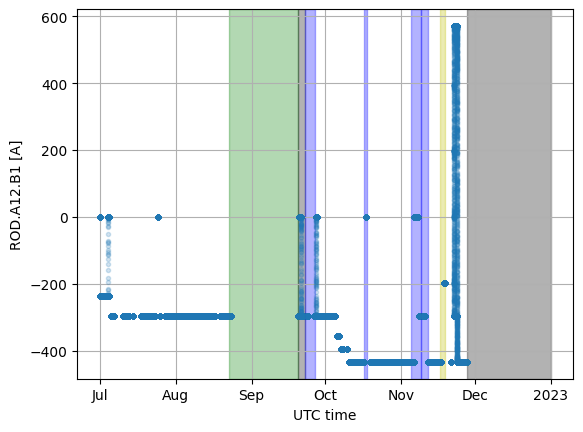

In [7]:
plt.plot(my_df['RPMBD.RR17.ROD.A12B1:I_MEAS'],'.', alpha=.2)
plt.grid(True)
plt.ylabel('ROD.A12.B1 [A]')
plt.xlabel('UTC time')
locator = md.AutoDateLocator()
xfmt = md.ConciseDateFormatter(locator)
ax = plt.gca()
ax.xaxis.set_major_formatter(xfmt)

def plot_schedule(ax):
    # https://indico.cern.ch/event/1194548/contributions/5093907/attachments/2560485/4413186/LHCFeedback.pdf
    
    #ax.axvspan(pd.Timestamp('2022-08-04'),pd.Timestamp('2022-08-23'), color= 'r', alpha=.3) # Collision >1200b
    ax.axvspan(pd.Timestamp('2022-08-23'),pd.Timestamp('2022-09-20'), color= 'g', alpha=.3) # RF problem
    ax.axvspan(pd.Timestamp('2022-09-20'),pd.Timestamp('2022-09-23'), color= 'k', alpha=.3) # RF problem
    ax.axvspan(pd.Timestamp('2022-11-28'),pd.Timestamp('2023-01'), color= 'k', alpha=.3) #YETS

    #MD and special
    ax.axvspan(pd.Timestamp('2022-10-17'),pd.Timestamp('2022-10-18'), color= 'b', alpha=.3)
    ax.axvspan(pd.Timestamp('2022-11-5'),pd.Timestamp('2022-11-9'), color= 'b', alpha=.3) 
    ax.axvspan(pd.Timestamp('2022-09-23'),pd.Timestamp('2022-09-27'), color= 'b', alpha=.3) # Special run LHCf
    ax.axvspan(pd.Timestamp('2022-11-09'),pd.Timestamp('2022-11-12'), color= 'b', alpha=.3) # Special run vdM

    #ION
    ax.axvspan(pd.Timestamp('2022-11-17'),pd.Timestamp('2022-11-19'), color= 'y', alpha=.3) 

plot_schedule(ax)

In [6]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import cm
from dask import dataframe as dd
from pathlib import Path
import matplotlib.colors as mcolors

def pandas_index_localize(df):
    df.index = df.index.map(lambda x: pd.Timestamp(x).tz_localize('UTC'))
    return df

In [9]:
my_fill = 8491
my_path = Path('/home/sterbini/japw22_lifetime/cross_sections_parquet')
B1_df = pandas_index_localize(pd.read_parquet(my_path/f'{my_fill}_B1.parquet'))
B2_df = pandas_index_localize(pd.read_parquet(my_path/f'{my_fill}_B2.parquet'))
lumi_df = pandas_index_localize(pd.read_parquet(f'/eos/project/l/lhc-lumimod/LuminosityFollowUp/2022_dev/rawdata/HX:FILLN={my_fill}/HX:BMODE=STABLE', 
    columns=['ATLAS:LUMI_TOT_INST',
             'CMS:LUMI_TOT_INST',
             'ALICE:LUMI_TOT_INST',
             'LHCB:LUMI_TOT_INST',      
]).sort_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


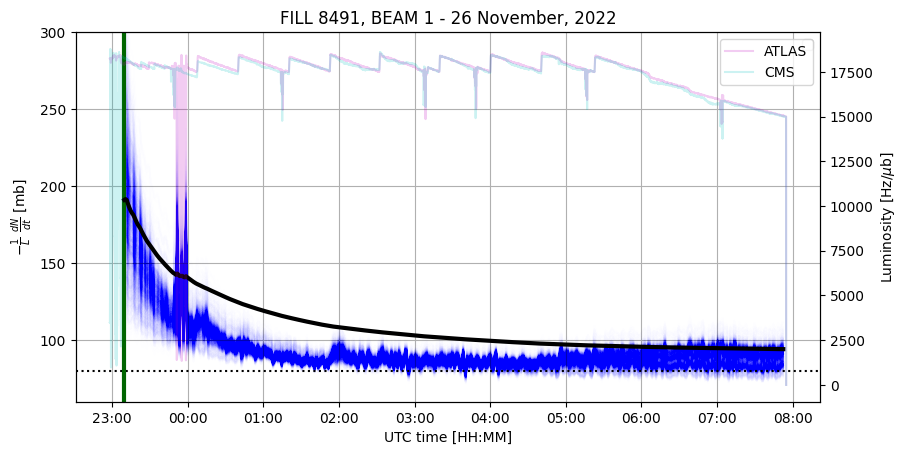

In [10]:
factor_size = .8
fig, (ax) = plt.subplots(figsize = [12*factor_size,6*factor_size], nrows=1)

my_df = pd.DataFrame(np.vstack(B1_df['sig_eff'].to_numpy())[:,90:]*1000,index = B1_df.index)
plt.plot(my_df,'b',alpha=.004)
#my_df = pd.DataFrame(np.vstack(B2_df['sig_eff'].to_numpy())[:,90:]*1000,index = B2_df.index)
#plt.plot(my_df,'r',alpha=.004)
plt.ylim([60,300])
xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill}, BEAM 1 - {pd.Timestamp(B1_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('UTC time [HH:MM]')
plt.ylabel('$-\\frac{1}{L}~\\frac{dN}{dt}$ [mb]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
#plt.xlim(xlim_1, xlim_2)
#plt.ylim(.8, 2.7)

plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)
plt.axhline(80,color='k', ls=':')

if True: 
    ax2 = ax.twinx()
    ax2.set_ylabel('Luminosity [Hz/$\mu$b]')
    ax2.plot(lumi_df['ATLAS:LUMI_TOT_INST'].dropna(),'m', alpha=.2,label='ATLAS')
    ax2.plot(lumi_df['CMS:LUMI_TOT_INST'].dropna(),'c', alpha=.2, label='CMS')
    ax2.tick_params(axis='y', colors='k')
    ax2.legend(loc='best')

ax.axvline(B1_df['sig_eff'].index[0], color=mcolors.CSS4_COLORS['darkgreen'], lw=3)

def nan_0_replacement(x):
    if x==0:
        return np.nan
    else:
        return x
        
for ii in my_df.columns:
    my_df[ii] = my_df[ii].apply(lambda x: nan_0_replacement(x))

my_mean = my_df.apply(np.nanmean, axis=1)
#ax.plot(my_mean,'gray')
ax.plot(my_mean.expanding().mean(),'k', lw=3)

#ax.axvline(B1_df['sig_eff'].between_time('04:00','05:00').index[0], color= mcolors.CSS4_COLORS['limegreen'], lw=3)
#ax.axvline(B1_df['sig_eff'].between_time('07:00','08:00').index[0], color= mcolors.CSS4_COLORS['lime'], lw=3)

In [11]:
my_mean.expanding().mean()

2022-11-26 23:09:34.125069056+00:00    191.022214
2022-11-26 23:10:34.125069056+00:00    191.589446
2022-11-26 23:11:34.125069056+00:00    190.929980
2022-11-26 23:12:34.125069056+00:00    188.415033
2022-11-26 23:13:34.125069056+00:00    186.173218
                                          ...    
2022-11-27 07:48:34.125069056+00:00     94.181929
2022-11-27 07:49:34.125069056+00:00     94.169713
2022-11-27 07:50:34.125069056+00:00     94.160191
2022-11-27 07:51:34.125069056+00:00     94.152898
2022-11-27 07:52:34.125069056+00:00     94.144637
Length: 524, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


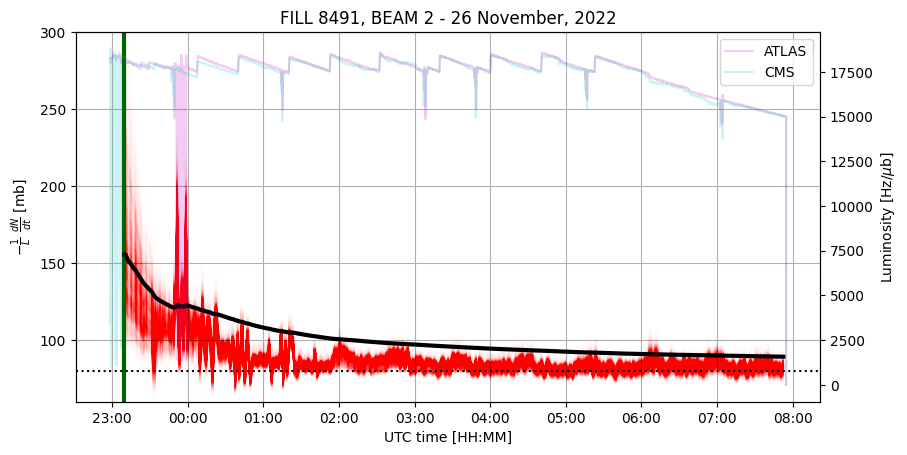

In [12]:
factor_size = .8
fig, (ax) = plt.subplots(figsize = [12*factor_size,6*factor_size], nrows=1)

my_df = pd.DataFrame(np.vstack(B2_df['sig_eff'].to_numpy())[:,90:]*1000,index = B2_df.index)
plt.plot(my_df,'r',alpha=.004)

plt.ylim([60,300])
xfmt = md.DateFormatter('%H:%M')
plt.title(f'FILL {my_fill}, BEAM 2 - {pd.Timestamp(B1_df.index.values[0]).strftime("%d %B, %Y")}')
plt.xlabel('UTC time [HH:MM]')
plt.ylabel('$-\\frac{1}{L}~\\frac{dN}{dt}$ [mb]')
#xlim_1 = pd.Timestamp('2022-11-26 23:30')
#xlim_2 = pd.Timestamp('2022-11-27 07:30')
#plt.xlim(xlim_1, xlim_2)
#plt.ylim(.8, 2.7)

plt.gca().xaxis.set_major_formatter(xfmt)
plt.legend(loc = 'best')
plt.grid(True)
plt.axhline(80,color='k', ls=':')

if True: 
    ax2 = ax.twinx()
    ax2.set_ylabel('Luminosity [Hz/$\mu$b]')
    ax2.plot(lumi_df['ATLAS:LUMI_TOT_INST'].dropna(),'m', alpha=.2,label='ATLAS')
    ax2.plot(lumi_df['CMS:LUMI_TOT_INST'].dropna(),'c', alpha=.2, label='CMS')
    ax2.tick_params(axis='y', colors='k')
    ax2.legend(loc='best')

ax.axvline(B1_df['sig_eff'].index[0], color=mcolors.CSS4_COLORS['darkgreen'], lw=3)
#ax.axvline(B1_df['sig_eff'].between_time('04:00','05:00').index[0], color= mcolors.CSS4_COLORS['limegreen'], lw=3)
#ax.axvline(B1_df['sig_eff'].between_time('07:00','08:00').index[0], color= mcolors.CSS4_COLORS['lime'], lw=3)

for ii in my_df.columns:
    my_df[ii] = my_df[ii].apply(lambda x: nan_0_replacement(x))
    

#https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
my_mean = my_df.apply(np.nanmean, axis=1)
ax.plot(my_mean.expanding().mean(),'k', lw=3, label = 'Cumulative Moving Average (CMA)')

In [13]:
my_mean.expanding().mean()

2022-11-26 23:09:34.125069056+00:00    155.698451
2022-11-26 23:10:34.125069056+00:00    155.637424
2022-11-26 23:11:34.125069056+00:00    153.788036
2022-11-26 23:12:34.125069056+00:00    151.777049
2022-11-26 23:13:34.125069056+00:00    150.738903
                                          ...    
2022-11-27 07:48:34.125069056+00:00     89.299261
2022-11-27 07:49:34.125069056+00:00     89.284641
2022-11-27 07:50:34.125069056+00:00     89.266050
2022-11-27 07:51:34.125069056+00:00     89.249263
2022-11-27 07:52:34.125069056+00:00     89.236272
Length: 524, dtype: float64

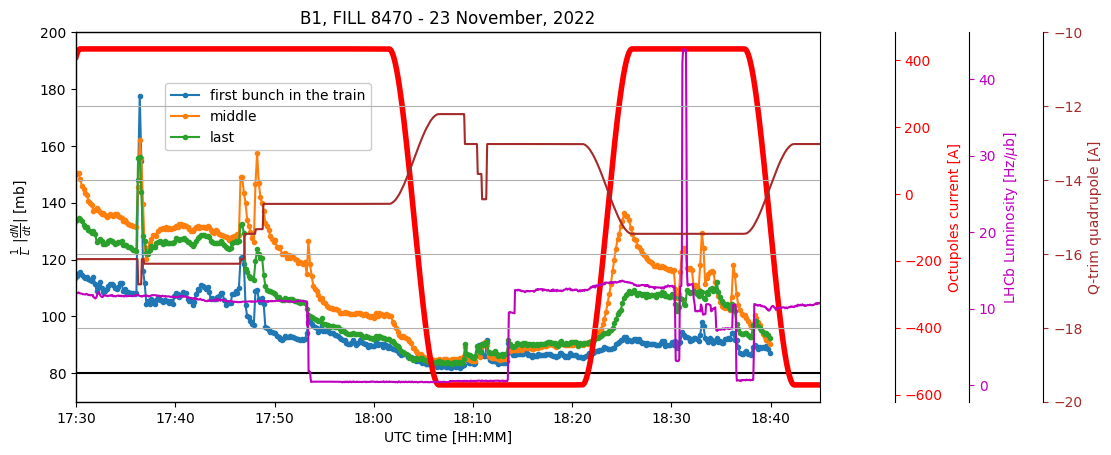

In [12]:
B1_dBLM = pandas_index_localize(pd.read_pickle('/eos/project/l/lhc-lumimod/MD7003/Offline/8470/xsection_dBLM_B1.pkl'))

my_fill = 8470
my_df = pandas_index_localize(pd.read_parquet(f'/eos/project/l/lhc-lumimod/MD7003/FILLS/{my_fill}.parquet').sort_index())

train_1 = [1067,1067+24-1,1067+48-1]
train_2 = [1961,1961+24-1,1961+48-1]
train_3 = [2855,2855+24-1,2855+48-1]

xlim_1 = pd.Timestamp('2022-11-23 17:30')
xlim_2 = pd.Timestamp('2022-11-23 18:45')
#fig, (ax) = plt.subplots(figsize = [12,6], nrows=1)

factor_size = .8
fig, (ax) = plt.subplots(figsize = [12*factor_size,6*factor_size], nrows=1)
xfmt = md.DateFormatter('%H:%M')

for bunches, label_name in zip(train_2, ['first bunch in the train', 'middle', 'last']):
    plt.plot(B1_dBLM['sig_eff'].apply(lambda x:x[bunches])*1000,'.-', label = label_name)
plt.ylim(70,200)
plt.axhline(80, color='k')
plt.xlim(xlim_1,xlim_2)
plt.gca().xaxis.set_major_formatter(xfmt)

# to plot octupoles
if True: 
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.1))
    ax_1.set_ylabel('Octupoles current [A]')
    p, = ax_1.plot(my_df['RPMBD.RR17.ROF.A12B1:I_MEAS'].dropna(),'r', lw=4)
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())

if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.2))
    ax_1.set_ylabel('LHCb Luminosity [Hz/$\mu$b]')
    p, = ax_1.plot(my_df['LHCB:LUMI_TOT_INST'].dropna(), color='m')
    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())


if True:
    ax_1 = ax.twinx()
    ax_1.spines.right.set_position(("axes", 1.3))
    ax_1.set_ylabel('Q-trim quadrupole [A]')

    df_trim = pandas_index_localize(
        pd.read_parquet('/home/sterbini/2023_01_23_chamonix/Q trim F8470.parquet'))
    p, = ax_1.plot(df_trim['RPMBB.UA27.RQTF.A23B1:I_MEAS'].dropna(), color='brown')

    ax_1.yaxis.label.set_color(p.get_color())
    ax_1.tick_params(axis='y', colors=p.get_color())
    ax_1.set_ylim(-20, -10)

plt.grid(True)
plt.title(f'B1, FILL {my_fill} - {pd.Timestamp(my_df.index.values[0]).strftime("%d %B, %Y")}')
ax.set_ylabel('$\\frac{1}{L}~|\\frac{dN}{dt}|$ [mb]')
ax.set_xlabel('UTC time [HH:MM]')

ax.legend(loc=(.12,.68), facecolor = 'white', framealpha=1)
